In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation

In [3]:
# age preparation function
def create_age_groups(age):
    if age <= 50:
        return "Young"
    if 50 < age <= 60:
        return "Middle"
    if age > 60:
        return "Old"
    else:
        return "Unknown"
    
# creatine phosphokinase preparation function
def create_creatine_phosphokinase(creatine_phosphokinase):
    if creatine_phosphokinase <= 198:
        return "Normal"
    if 198 < creatine_phosphokinase <= 1000:
        return "High"
    if creatine_phosphokinase > 1000:
        return "Very high"
    else:
        return "Unknown"
    
# ejection fraction preparation function
def create_ejection_fraction(ejection_fraction):
    if ejection_fraction <= 40:
        return "Very_low"
    if 40 < ejection_fraction <= 50:
        return "low"
    if 50 < ejection_fraction:
        return "Normal"
    else:
        return "Unknown"

def prepare_data(data_frame, train_set=True):
    # create new feature
    data_frame["age_group"] = data_frame.age.apply(create_age_groups)
    data_frame["c_p"] = data_frame.creatinine_phosphokinase.apply(create_creatine_phosphokinase)
    data_frame["e_f"] = data_frame.ejection_fraction.apply(create_ejection_fraction)
    

    
    # drop features that we are not going to use
    data_frame.drop(["age","creatinine_phosphokinase", "platelets", "serum_creatinine", "time", "serum_sodium", "ejection_fraction"], axis=1, inplace=True)
    
    # rename column "sex" to "gender" and column "creatinine_posphate" to "creatine_phospahate"
    data_frame.rename({"sex": "gender"}, axis=1, inplace=True)
    data_frame.rename({"creatinine_phosphokinase": "creatine_phosphokinase"}, axis=1, inplace=True)
    data_frame.rename({"age_group": "age"}, axis=1, inplace=True)
    data_frame.rename({"c_p": "creatine_phosphokinase"}, axis=1, inplace=True)
    data_frame.rename({"e_f": "ejection_fraction"}, axis=1, inplace=True)
    
    
    # rearange order of columns
    if train_set:
        data_frame = data_frame[["age", "anaemia", "creatine_phosphokinase", "diabetes", "ejection_fraction", "high_blood_pressure", "gender", "smoking", "DEATH_EVENT"]]
    else:
        data_frame = data_frame[["age", "anaemia", "creatine_phosphokinase", "diabetes", "ejection_fraction", "high_blood_pressure", "gender", "smoking"]]
    
    # replace strings with values
    data_frame.age.replace({"Young": 0, "Middle": 1, "Old": 2, "Unknown": 3}, inplace=True)
    data_frame.creatine_phosphokinase.replace({"Normal": 0, "High": 1, "Very high": 2, "Unknown": 3}, inplace=True)
    data_frame.ejection_fraction.replace({"Very_low": 0, "low": 1, "Normal": 2, "Unknown": 3}, inplace=True)

    return data_frame

    
    

In [4]:
# Loading the data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# update data frame
data = prepare_data(data)

# top 5 data points
data.head()

/home/amatullah/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,gender,smoking,DEATH_EVENT
0,2,0,1,0,0,1,1,0,1
1,1,0,2,0,0,0,1,0,1
2,2,0,0,0,0,0,1,1,1
3,0,1,0,0,0,0,1,0,1
4,2,1,0,1,0,0,0,0,1


# Graphs

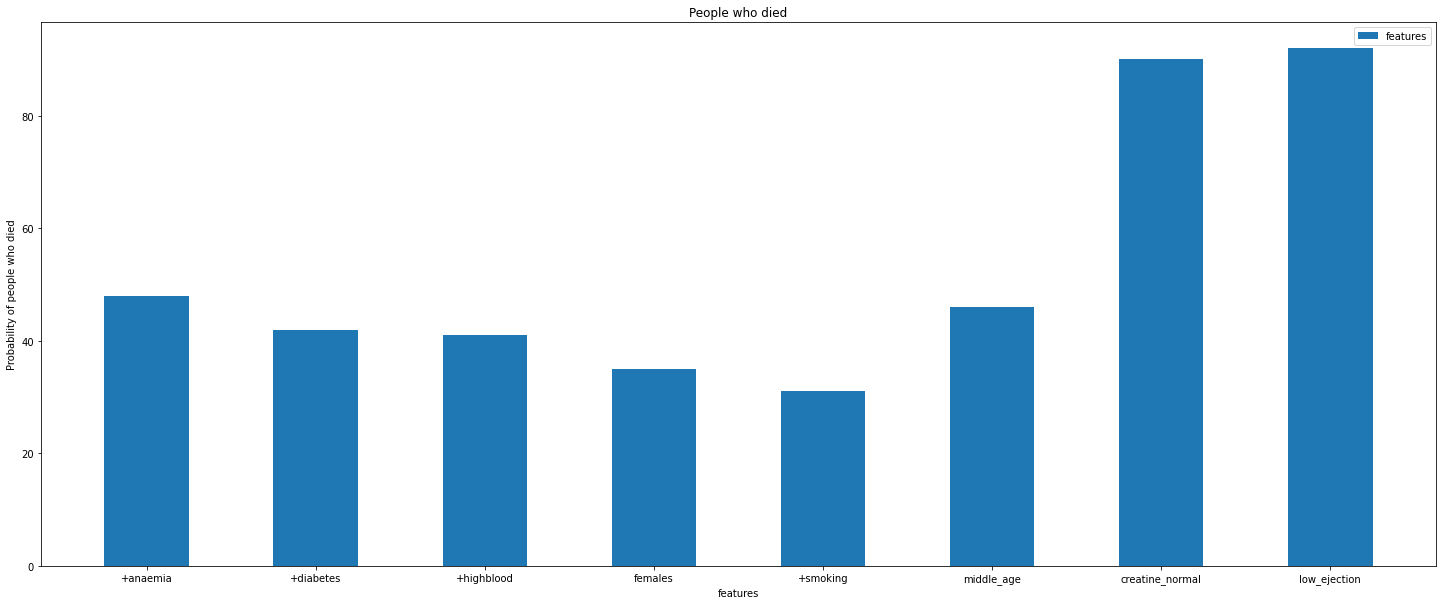

48


In [5]:
# trim data to only people who died
death_data = data[data.DEATH_EVENT != 0]

# number of deaths in each feature
number_of_deaths = len(death_data)
positive_anaemia = len(death_data[death_data.anaemia != 0])
positive_diabetes = len(death_data[death_data.diabetes != 0])
positive_highblood = len(death_data[death_data.high_blood_pressure != 0])
positive_gender = len(death_data[death_data.gender != 1])#females
positive_smoking = len(death_data[death_data.smoking != 0])
positive_middle_age = len(death_data[death_data.age != 2])
positive_old_age = len(death_data[death_data.age == 2])
positive_creatine_normal = len(death_data[death_data.creatine_phosphokinase != 2])
positive_creatine_high = len(death_data[death_data.creatine_phosphokinase == 2])
positive_low_ejection = len(death_data[death_data.ejection_fraction != 2])
positive_normal_ejection= len(death_data[death_data.ejection_fraction == 2])

# probability of deaths
probability_anaemia = round((positive_anaemia/number_of_deaths)*100)
probability_diabetes = round((positive_diabetes/number_of_deaths)*100)
probability_highblood = round((positive_highblood/number_of_deaths)*100)
probability_gender = round((positive_gender/number_of_deaths)*100)

probability_smoking = round((positive_smoking/number_of_deaths)*100)
probability_middle_age = round((positive_middle_age/number_of_deaths)*100)
probability_old_age = round((positive_old_age/number_of_deaths)*100)
probability_creatine_normal = round((positive_creatine_normal/number_of_deaths)*100)
probability_creatine_high = round((positive_creatine_high/number_of_deaths)*100)
probability_low_ejection = round((positive_low_ejection/number_of_deaths)*100)
probability_normal_ejection = round((positive_normal_ejection/number_of_deaths)*100)

# plotting the graph
N = 8

#data on y-axis
bar = (probability_anaemia, probability_diabetes, probability_highblood, probability_gender, 
       probability_smoking, probability_middle_age, probability_creatine_normal,
       probability_low_ejection)

#position of bars on x-axis
index = np.arange(N)

#figure size
plt.figure(figsize=(25,10))

# width of bar
width = 0.5

#plotting
plt.bar(index, bar, width, label='features')

plt.xlabel('features')
plt.ylabel('Probability of people who died')
plt.title('People who died')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(index , ('+anaemia', '+diabetes', '+highblood', 'females', 
       '+smoking', 'middle_age', 'creatine_normal',
       'low_ejection'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

print(probability_anaemia)

# Splitting into training, validation and testing data

In [6]:
training_data = data[:180]
training_data.tail()

,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,gender,smoking,DEATH_EVENT
175,1,1,0,0,2,0,1,1,0
176,2,0,2,0,0,0,1,1,0
177,0,1,0,0,1,0,0,0,0
178,2,1,0,1,2,0,1,0,0
179,1,0,1,0,0,0,1,1,0


In [7]:
testing_data = data[180:240]
testing_data.tail()

,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,gender,smoking,DEATH_EVENT
235,2,1,0,0,1,1,1,0,0
236,2,0,0,0,1,1,1,0,0
237,2,0,1,0,0,0,1,0,0
238,2,1,1,1,0,0,0,0,0
239,1,1,0,0,1,0,1,1,0


In [8]:
validation_data = data[240:]
validation_data.tail()

,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,gender,smoking,DEATH_EVENT
294,2,0,0,1,0,1,1,1,0
295,1,0,2,0,0,0,0,0,0
296,0,0,2,1,2,0,0,0,0
297,0,0,2,0,0,0,1,1,0
298,0,0,0,0,1,0,1,1,0


# Naive Bayes Algorithm

In [10]:
number_of_attributes = 21

age_frequency = pd.crosstab(index=data['age'], columns='count_age')

probability_death = len(data[data.DEATH_EVENT==1])/len(data)
probability_alive = len(data[data.DEATH_EVENT==0])/len(data)
death_data = data[data.DEATH_EVENT != 0]
alive_data = data[data.DEATH_EVENT != 1]

bayes_theorem_death_probabilities = {}
for i in data:
    store_probabilities = []
    
    frequency = pd.crosstab(index=data[i], columns='counts')    
    
    for counter in range(len(frequency)):
        if i != 'DEATH_EVENT': 
            frequency_death = pd.crosstab(index=death_data[i], columns='counts')
        else:
            break
        
        probability_conditional = frequency_death.counts[counter]/len(death_data) #P(attribute|death)
        probability_attribute = frequency.counts[counter]/len(data) #P(attribute)
        
        #Bayes Theorem P(death|attribute) = P(attribute|death)*P(death)/P(attribute)
        bayes_theorem_death = (probability_conditional*probability_death)/probability_attribute
        storage = store_probabilities.append(bayes_theorem_death)
        #print(frequency_death)
    bayes_theorem_death_probabilities[i] = store_probabilities

for row in range(len(data)):
    probability = 1
    for feature in bayes_theorem_death_probabilities:
        if feature != 'DEATH_EVENT':
            feature_probability = bayes_theorem_death_probabilities[feature][data[feature][row]]
            probability = probability*feature_probability
    probability = probability*probability_death /feature_probability
    print(probability)
        
    '''for attribute in range(len(bayes_theorem_death_probabilities) - 1):
        
    probabilities_arrays = bayes_theorem_death_probabilities[feature]
    
    for feature in bayes_theorem_death_probabilities:
        probability_of_individual = bayes_theorem_death_probabilities[feature][data[feature][attribute]]
        print(data.head())
        print(probability_of_individual)'''
    
print(data['age'][0])

### ALMOST DONE....


0.00016405090249531725
7.918163001467747e-05
0.00011901519162498095
9.760870330362429e-05
0.00014536514861260625
0.0001824112505943571
0.00015733432459406492
6.831058575943346e-05
7.035270951961872e-05
0.0001824112505943571
0.0001824112505943571
0.00016405090249531722
0.0001064296379725444
0.00012339305750964433
0.0001250231347670682
0.00012005650552648157
0.00014429438736548073
8.77840364351549e-05
0.0001848209844731766
6.255358614812477e-05
0.0001848209844731766
0.00018376486456190126
0.00019889582287029159
5.167338707017496e-05
0.00016526827035109553
0.00011833510481569533
0.0001848209844731766
0.0001141505478357832
0.00010800006047350776
0.00011833510481569533
0.00016311346876677257
9.081647026435828e-05
0.0001355425416364853
9.833302542583525e-05
0.0001141505478357832
0.0001290290920657063
0.00010947699203482348
0.00015289692052933537
7.872916355745076e-05
9.785023201207365e-05
0.00016405090249531722
0.00010253084702161537
0.0001244663751216836
0.0001141505478357832
6.921299902753